# Custom Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Model():
    def __init__(self):
        self.w = tf.Variable(2.0)
        self.b = tf.Variable(1.0)
        
    def __call__(self, x):
        return self.w * x + self.b
    
model = Model()

## Synthetic Data

In [3]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs = tf.random.normal(shape=[NUM_EXAMPLES])
ys = (TRUE_w * xs) + TRUE_b

In [4]:
def loss(y_hat, y):
    return tf.reduce_mean(tf.square(y_hat - y))

In [5]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c='b', marker='.')
    predicted = plt.scatter(inputs, predicted_outputs, c="r", marker='+')
    plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
    plt.show()

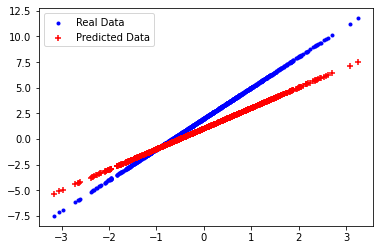

Current loss: 2.067799


In [6]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

## Defining Training Loop
- Gradient descent updates the trainable weightes w and b to reduce loss

In [7]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
    
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    
    return current_loss

In [13]:
model = Model()

# collect the history of W values and b values to plot later
list_w = []
list_b = []
epochs = range(15)
losses = []
for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    
    current_loss = train(model, xs, ys, learning_rate=0.1)
    
    losses.append(current_loss)
    
    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=2.06780
Epoch  1: w=2.21 b=1.20, loss=1.30088
Epoch  2: w=2.38 b=1.37, loss=0.81847
Epoch  3: w=2.51 b=1.49, loss=0.51499
Epoch  4: w=2.61 b=1.60, loss=0.32406
Epoch  5: w=2.69 b=1.68, loss=0.20394
Epoch  6: w=2.76 b=1.74, loss=0.12835
Epoch  7: w=2.81 b=1.80, loss=0.08079
Epoch  8: w=2.85 b=1.84, loss=0.05085
Epoch  9: w=2.88 b=1.87, loss=0.03201
Epoch 10: w=2.91 b=1.90, loss=0.02016
Epoch 11: w=2.93 b=1.92, loss=0.01269
Epoch 12: w=2.94 b=1.93, loss=0.00799
Epoch 13: w=2.95 b=1.95, loss=0.00503
Epoch 14: w=2.96 b=1.96, loss=0.00317


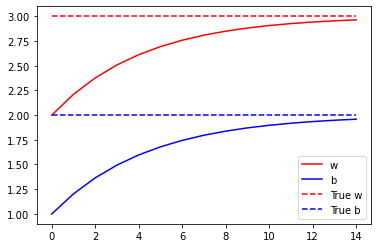

In [14]:
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

## Plots for Evaluation

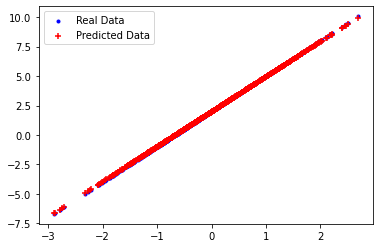

In [15]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

In [16]:
def plot_loss_for_weights(weights_list, losses):
    for idx, weights in enumerate(weights_list):
        plt.subplot(120 + idx + 1)
        plt.plot(weights['values'], losses, 'r')
        plt.plot(weights['values'], losses, 'bo')
        plt.xlabel(weights['name'])
        plt.ylabel('Loss')

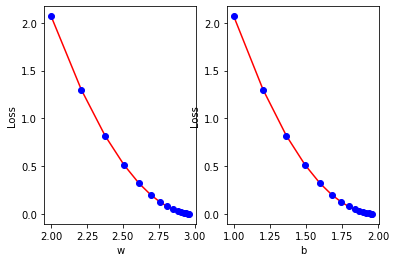

In [17]:
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)